# R jupyter notebook to generate the example figure
___

## Load and install dependencies

In [1]:
# install the FastUtils package to simplify dependency installation
suppressPackageStartupMessages(if (!require(FastUtils, quietly = TRUE)) {
    install.packages("FastUtils")
    library(FastUtils)
})

# create package loader function
packageLoader <- FastUtils::createPkgLoader()

# install and load relevant packages
packageLoader(
    cran = c("ggplot2", "APackOfTheClones", "patchwork"),
    bioc = c("Seurat", "scRepertoire"),
    verbose = FALSE
)

## Example data loading

In [2]:
# get the scRepertoire TCR data, loaded into the env as `contig_list`
data(contig_list, package = "scRepertoire")
summary(contig_list)

     Length Class      Mode
P17B 18     data.frame list
P17L 18     data.frame list
P18B 18     data.frame list
P18L 18     data.frame list
P19B 18     data.frame list
P19L 18     data.frame list
P20B 18     data.frame list
P20L 18     data.frame list

In [3]:
# get the corresponding Seurat object, the full version of `scRep_example`
# from scRepertoire v2. If concerned about the security of the drive link,
# you must go to the related publication and manually download and pre-process
# the linked data yourself.
pbmc <- Seurat::UpdateSeuratObject(readRDS("data/scRep_example_full.rds"))
pbmc

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘mnn’

Updating matrix keys for DimReduc ‘umap’

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in RNA_nn

Setting default assay of RNA_nn to RNA

Updating slots in RNA_snn

Setting default assay of RNA_snn to RNA

Updating slots in mnn

Updating slots in umap

Setting umap DimReduc to global

Setting assay used for RunUMAP.RNA.mnn to RNA

Setting assay used for FindNeighbors.RNA.mnn to RNA

No assay information could be found for FindClusters

Warning message:
“Adding a command log without an assay associated with it”
Validating object structure for Assay ‘RNA’

Validating object structure for Graph ‘RNA_nn’

Validating object structure for Graph ‘RNA_snn’

Validating object structure for DimReduc ‘mnn’

Validating object structure for DimReduc ‘umap’

Object representa

An object of class Seurat 
33538 features across 30105 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: mnn, umap

## Contig list preprocessing

In [4]:
contig_list <- scRepertoire::combineTCR(
    contig_list,
    samples = c("P17B", "P17L", "P18B", "P18L", "P19B", "P19L", "P20B", "P20L"),
    removeNA = FALSE,
    removeMulti = FALSE,
    filterMulti = FALSE
)
summary(contig_list)

     Length Class      Mode
P17B 12     data.frame list
P17L 12     data.frame list
P18B 12     data.frame list
P18L 12     data.frame list
P19B 12     data.frame list
P19L 12     data.frame list
P20B 12     data.frame list
P20L 12     data.frame list

## Combining contigs and the Seurat object

In [5]:
pbmc <- scRepertoire::combineExpression(
    contig_list, pbmc
)
pbmc

An object of class Seurat 
33538 features across 30105 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: mnn, umap

## Running APackOfTheClones processing

In [6]:
# do the initial run
pbmc <- APackOfTheClones::RunAPOTC(pbmc)

# nudge some clusters manually
pbmc <- APackOfTheClones::AdjustAPOTC(
    pbmc,
    new_rad_scale_factor = 0.9,
    nudge_cluster = c(8, 6, 2, 16, 12, 13, 10, 15, 14, 17, 11),
    nudge_vector = list(
        c(-3, 0),
        c(-1, 2),
        c(-1.25, -1),
        c(0, -1),
        c(2, 0),
        c(1, 0),
        c(1.3, 0),
        c(1, 0.5),
        c(2.6, 0),
        c(2, 0.2),
        c(3, 0.2)
    )
)

# create the final clonal expansion plot
clonalExpansionPlot <- APackOfTheClones::APOTCPlot(
    pbmc,
    legend_position = "bottom left",
    legend_sizes = c(1, 50, 200),
    add_legend_background = FALSE,
    use_default_theme = FALSE,
    retain_axis_scales = TRUE
)

Initializing APOTC run...

* Setting `clone_scale_factor` to 0.05

* id for this run: umap;CTstrict;_;_


Packing clones into clusters



[==================================================] 100%




repulsing all clusters | max iterations = 20



[==================================================] 100%



Completed successfully, time elapsed: 0.298 seconds


* using the latest APackOfTheClones Run Data with object id: umap;CTstrict;_;_

* using the latest APackOfTheClones Run Data with object id: umap;CTstrict;_;_

* generated ggplot object



## Creating the figure

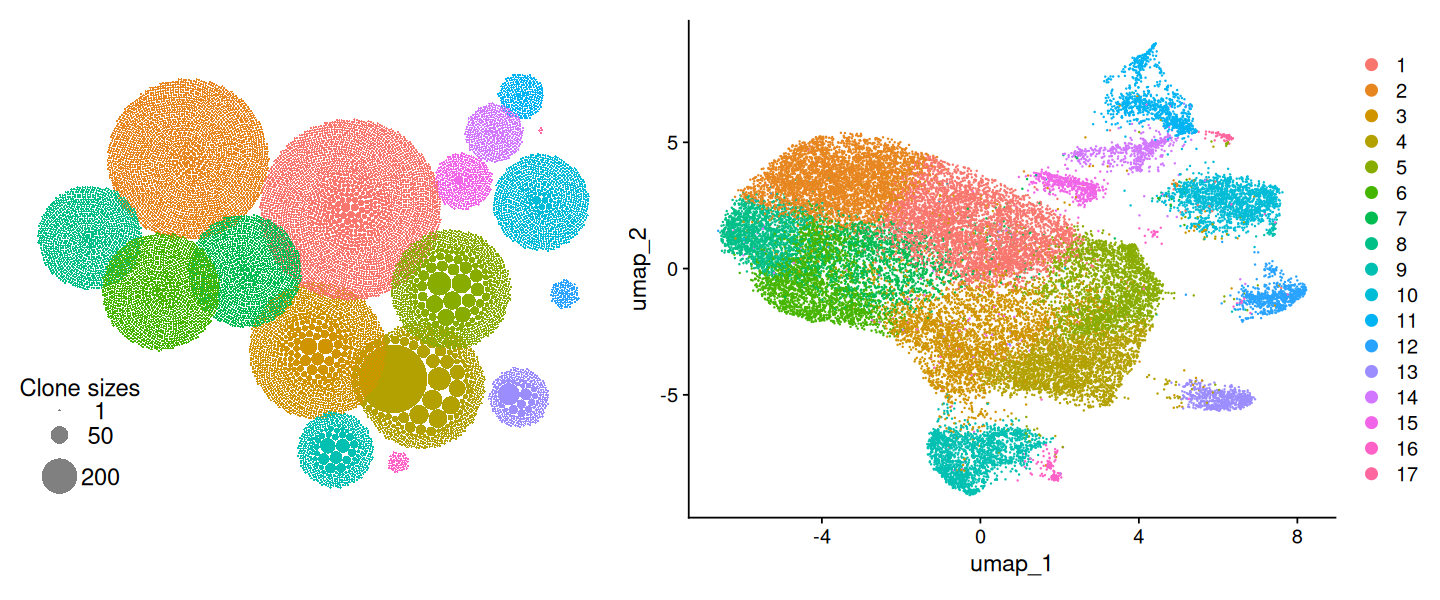

In [9]:
# create the UMAP plot
umapPlot <- Seurat::DimPlot(pbmc)

# combine the plots with patchwork
options(repr.plot.width = 12, repr.plot.height = 5)
clonalExpansionPlot + umapPlot

In [ ]:
# optionally save the plot
ggplot2::ggsave("clonal_expansion_umap_plot.png")